Выбранные темы: цены на кофе, магазины, оценки студентов
Далее идут выбранные таблицы

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

label_encoder = LabelEncoder()

# Функция для применения oversampling
def apply_oversampling(X, y):
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

# Функция для применения undersampling
def apply_undersampling(X, y):
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

Отслеживание цен на акции Старбакс. Объекты связаны между собой датой, т.е. каждая следующая строка это новый день. Можно узнать как, относительно изменения цен на акции, идут продажи акций. Поможет для трейдинговых компаний. Целевым признаком является количество покупающих.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
              Open         High          Low        Close    Adj Close  \
count  8036.000000  8036.000000  8036.000000  8036.000000  8036.000000   
mean     30.054280    30.351487    29.751322    30.058857    26.674025   
std      33.615577    33.906613    33.314569    33.615911    31.728090   
min       0.328125     0.347656     0.320313     0.33593

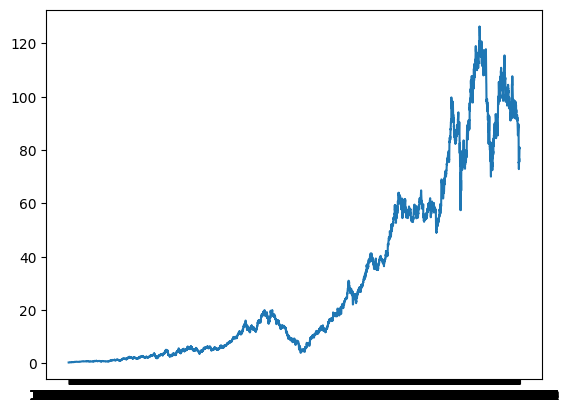

In [4]:
df1 = pd.read_csv("../data/coffee.csv")
df1.info()
print(df1.isnull().sum())
print(df1.describe())
print()
print(df1["Date"].value_counts().unique())
print()
plt.plot(df1["Date"], df1["High"])
plt.show()


Данные по всем параметрам являются правильными, без шумов, без выбросов, актуальными.

Магазины. Каждая строка представляет собой магазин, его площадь, количество продуктов, количество покупателей и объем продаж. Позволяет увидеть изменения количества продаж относительно размеров магазина и количества покупателей. Ключевой признак - количество продаж

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB
Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64
        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%   

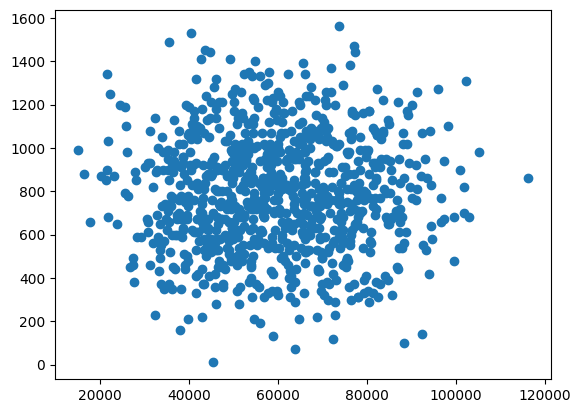

In [5]:
df2 = pd.read_csv("../data/store.csv")
df2.info()
print(df2.isnull().sum())
print(df2.describe())
print()



plt.scatter(df2["Store_Sales"], df2["Daily_Customer_Count"])
plt.show()

Данные имеют некоторое количество выбросов, что видно на графике.

Оценки студентов. Показывает оценки конкретного студента. Аналитика относительно гендера, расы, уровня образования родителей. Поможет для онлайн-школ для опредения контенгента покупателей курсов. Ключевыми значениями являются оценки по предметам.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standa

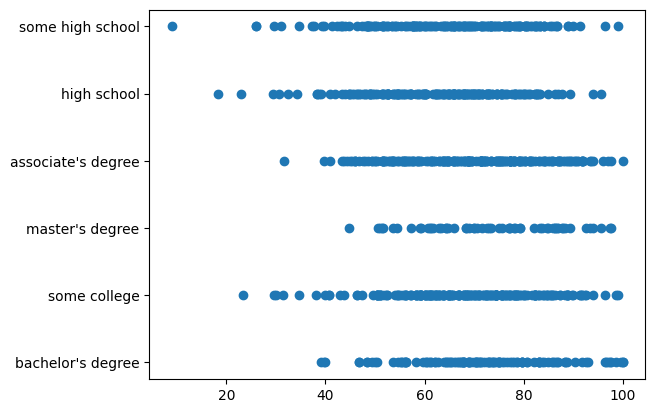

In [6]:
df3 = pd.read_csv("../data/student.csv")
df3.info()
df3["score"] = (df3["math score"] + df3["reading score"] + df3["writing score"]) / 3
print(df3.head())
print(df3.isnull().sum())
print(df3.describe())
print()
plt.scatter(df3["score"], df3["parental level of education"])
plt.show()


Для всех выбранных тем отсутствуют пустые ячейки. Заполнение пустых ячеек не требуется. Данные вполне реальные.

Разбиение наборов на выборки.

Акции старбакс.

In [69]:
data = df1[["Volume", "High", "Low"]].copy()
data["Volume_Grouped"] = pd.cut(data["Volume"], bins=50, labels=False)

interval_counts = data["Volume_Grouped"].value_counts().sort_index()

min_samples_per_interval = 5
for interval, count in interval_counts.items():
    if count < min_samples_per_interval:
        data.loc[data["Volume_Grouped"] == interval, "Volume_Grouped"] = -1


df_coffee_train, df_coffee_val, df_coffee_test = split_stratified_into_train_val_test(
    data, stratify_colname="Volume_Grouped", frac_train=0.60, frac_val=0.20, frac_test=0.20)

print("Обучающая выборка: ", df_coffee_train.shape)
print(df_coffee_train["Volume_Grouped"].value_counts())

X_resampled, y_resampled = apply_oversampling(df_coffee_train, df_coffee_train["Volume_Grouped"])
df_coffee_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_coffee_train_adasyn.shape)
print(df_coffee_train_adasyn["Volume_Grouped"].value_counts())

print("Контрольная выборка: ", df_coffee_val.shape)
print(df_coffee_val["Volume_Grouped"].value_counts())

print("Тестовая выборка: ", df_coffee_test.shape)
print(df_coffee_test["Volume_Grouped"].value_counts())

Обучающая выборка:  (4821, 4)
Volume_Grouped
 0    2802
 1    1460
 2     369
 3     111
 4      40
 5      18
-1      10
 6       7
 7       4
Name: count, dtype: int64
Обучающая выборка после oversampling:  (25218, 4)
Volume_Grouped
 0    2802
 4    2802
 1    2802
 2    2802
 3    2802
 5    2802
-1    2802
 7    2802
 6    2802
Name: count, dtype: int64
Контрольная выборка:  (1607, 4)
Volume_Grouped
 0    934
 1    487
 2    123
 3     37
 4     13
 5      6
-1      4
 6      2
 7      1
Name: count, dtype: int64
Тестовая выборка:  (1608, 4)
Volume_Grouped
 0    934
 1    487
 2    124
 3     37
 4     14
 5      6
-1      3
 6      2
 7      1
Name: count, dtype: int64


Магазины

In [68]:
data = df2[["Store_Sales", "Store_Area", "Daily_Customer_Count"]].copy()
data["Sales_Grouped"] = pd.cut(data["Store_Sales"], bins=6, labels=False)

interval_counts = data["Sales_Grouped"].value_counts().sort_index()

min_samples_per_interval = 10
for interval, count in interval_counts.items():
    if count < min_samples_per_interval:
        data.loc[data["Sales_Grouped"] == interval, "Sales_Grouped"] = -1

df_shop_train, df_shop_val, df_shop_test = split_stratified_into_train_val_test(
    data, stratify_colname="Sales_Grouped", frac_train=0.60, frac_val=0.20, frac_test=0.20)


print("Обучающая выборка: ", df_shop_train.shape)
print(df_shop_train["Sales_Grouped"].value_counts())

X_resampled, y_resampled = apply_oversampling(df_shop_train, df_shop_train["Sales_Grouped"])
df_shop_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_shop_train_adasyn.shape)
print(df_shop_train_adasyn["Sales_Grouped"].value_counts())

print("Контрольная выборка: ", df_shop_val.shape)
print(df_shop_val["Sales_Grouped"].value_counts())

print("Тестовая выборка: ", df_shop_test.shape)
print(df_shop_test["Sales_Grouped"].value_counts())

Обучающая выборка:  (537, 4)
Sales_Grouped
 2    184
 3    148
 1    135
 4     45
 0     20
-1      5
Name: count, dtype: int64
Обучающая выборка после oversampling:  (1104, 4)
Sales_Grouped
 3    184
 1    184
 2    184
 0    184
-1    184
 4    184
Name: count, dtype: int64
Контрольная выборка:  (179, 4)
Sales_Grouped
 2    61
 3    49
 1    45
 4    15
 0     7
-1     2
Name: count, dtype: int64
Тестовая выборка:  (180, 4)
Sales_Grouped
 2    61
 3    50
 1    45
 4    15
 0     7
-1     2
Name: count, dtype: int64


Оценки студентов

In [67]:
data = df3[["score", "gender", "race/ethnicity"]].copy()
data["score_grouped"] = pd.cut(data["score"], bins=5, labels=False)

data["gender"] = label_encoder.fit_transform(data['gender'])
data["race/ethnicity"] = label_encoder.fit_transform(data['race/ethnicity'])

interval_counts = data["score_grouped"].value_counts().sort_index()

min_samples_per_interval = 10
for interval, count in interval_counts.items():
    if count < min_samples_per_interval:
        data.loc[data["score_grouped"] == interval, "score_grouped"] = -1

df_mark_train, df_mark_val, df_mark_test = split_stratified_into_train_val_test(
    data, stratify_colname="score_grouped", frac_train=0.60, frac_val=0.20, frac_test=0.20)




print("Обучающая выборка: ", df_mark_train.shape)
print(df_mark_train["score_grouped"].value_counts())

X_resampled, y_resampled = apply_oversampling(df_mark_train, df_mark_train["score_grouped"])
df_mark_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_mark_train_adasyn.shape)
print(df_mark_train_adasyn["score_grouped"].value_counts())

print("Контрольная выборка: ", df_mark_val.shape)
print(df_mark_val["score_grouped"].value_counts())

print("Тестовая выборка: ", df_mark_test.shape)
print(df_mark_test["score_grouped"].value_counts())

Обучающая выборка:  (600, 4)
score_grouped
 3    283
 2    181
 4    101
 1     31
-1      4
Name: count, dtype: int64
Обучающая выборка после oversampling:  (1415, 4)
score_grouped
 2    283
 4    283
 3    283
 1    283
-1    283
Name: count, dtype: int64
Контрольная выборка:  (200, 4)
score_grouped
 3    95
 2    61
 4    33
 1    10
-1     1
Name: count, dtype: int64
Тестовая выборка:  (200, 4)
score_grouped
 3    94
 2    60
 4    34
 1    11
-1     1
Name: count, dtype: int64
